# Lecture 12: Entropy & Information Theory

Topics:

* Maximum entropy method
  * Applications
* Final Project
* Final Thoughts & Career Advice


# Entropy

## Motivation

Let's start with a simple question:
If you have a single die with six sides (1 to 6) and all you know is that the average outcome from a large number of rolls is 3.5, what are the probabilities you should assign to each side of the die?

The natural answer is to assign a probability $p= \frac{1}{6}$ since $\sum_{i=1}^6 p \times i = 3.5$.

But why choose all of the $p_i$'s to be equal? Why not $p_3 = \frac{1}{2}, p_4 = \frac{1}{2}$ and all other $p_i$ to be $0$? 

While it may be intuitive to assign equal probabilities to each side of the die there are, in fact, an infinite number of probability combinations that could be assigned.

Consider a slight modification where the mean is 4.5, how should probabilities be assigned?

Maybe the choice of the "optimal" probabilities should be the result of a an optimization. Along the lines of $\max_{p_i} H(p_1,\dots,p_6)$, where we find the values of $p_i$ that maximize the function. In 1957, [Jaynes](https://bayes.wustl.edu/etj/articles/theory.1.pdf) suggested that the optimal solution could be found by maximizing entropy:

$$
H(p_i) = - \sum_i^N p_i \log (p_i)
$$

Jaynes argues that the maxent distribution is “uniquely determined as the one which is maximally noncommittal with regard to missing information, in that it agrees with what is known, but expresses maximum uncertainty with respect to all other matters”

Entropy, is the foundation of [information theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)), developed by [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) in 1948.

We shall see that this approach has significant benefits.

In [2]:
def entropy_func(p):
    '''
    Function to compute the entropy
    
    Input: probability
    Output: Positive value of Jaynes entropy function (i.e. ignoring the leading negative sign)
    
    Original code by Dmitry Azarnyh, September 2019
    '''
    import numpy as np
    s = 0
    for p_i in p:
        if p_i<1e-10:
            continue
        # as we need to minimize, no minus
        s += np.log(p_i)*p_i
    return s

In [3]:
def die_prob(NUM_SIDES, MEAN):
    '''
    Function to calculate the entropy assigning face probabilities for a single die
    
    Input: NUM_SIDES = number of sides on the die
           MEAN = expected mean of the throws
           
    Output: Plot of the probabilities, the mean based on those probabilities and their associated
            values
    
    RRL April 2021 based on original code by Dmitry Azarnyh, September 2019
    '''
    import numpy as np
    from scipy.optimize import minimize
    import matplotlib.pyplot as plt
    %matplotlib inline
    ini_guess = np.array([1/NUM_SIDES]*NUM_SIDES)
    guess_mean = np.arange(1, 1+NUM_SIDES).dot(ini_guess)
    
    # probability sum is one
    cons0 = {'type':'eq', 'fun': lambda x: np.ones(NUM_SIDES).dot(x) - 1. }
    
    # all probabilities are positive
    # (not necessary for entropy, but might be helpful for other functions)
    bnds = tuple([(0, None)]*(NUM_SIDES))
    
    # known mean
    if MEAN >= guess_mean:
        cons1 = {'type':'ineq', 'fun': lambda x: np.arange(1, 1+NUM_SIDES).dot(x)-MEAN}
    else:
        cons1 = {'type':'ineq', 'fun': lambda x: MEAN - np.arange(1, 1+NUM_SIDES).dot(x)}

    # equal to exponential in continuous case only
    # in discrete somewhat in between uniform and exponential
    plt.figure(figsize=(12, 6))
    sol = minimize(entropy_func, ini_guess, bounds=bnds,
                   constraints=[cons0, cons1], options={'maxiter':10001})

    # plot
    plt.bar(np.arange(1, 1+NUM_SIDES), sol.x)
    plt.axvline(x=MEAN, color='r')
    plt.xlabel("Side of dice")
    plt.ylabel("Probability")
    plt.show()
    
    # print
    i = 0
    for x in sol.x:
        i += 1
        print(f'For side {i}, probability = {sol.x[i-1]:2.3}')
    print(f'The mean is {np.arange(1, 1+NUM_SIDES).dot(sol.x):2.2}')

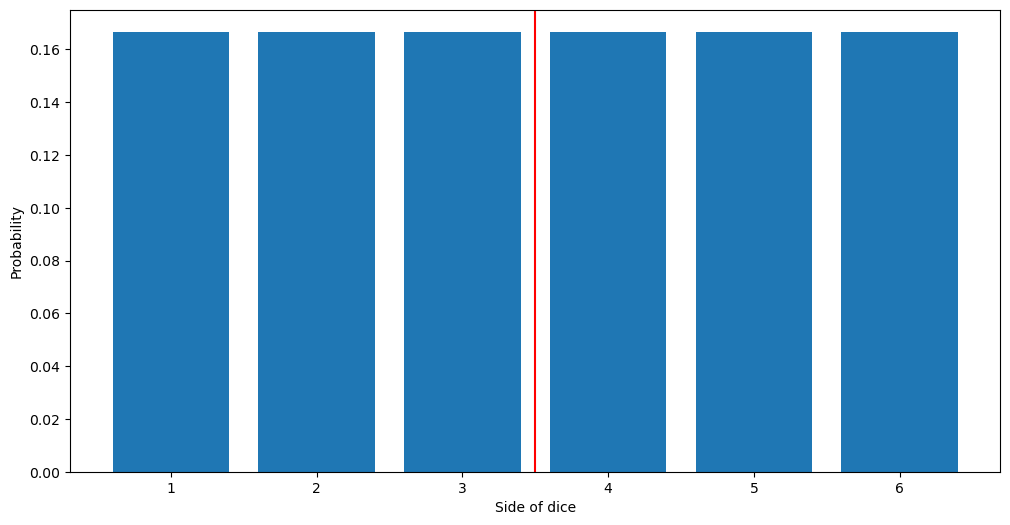

For side 1, probability = 0.167
For side 2, probability = 0.167
For side 3, probability = 0.167
For side 4, probability = 0.167
For side 5, probability = 0.167
For side 6, probability = 0.167
The mean is 3.5


In [4]:
die_prob(6, 3.5)

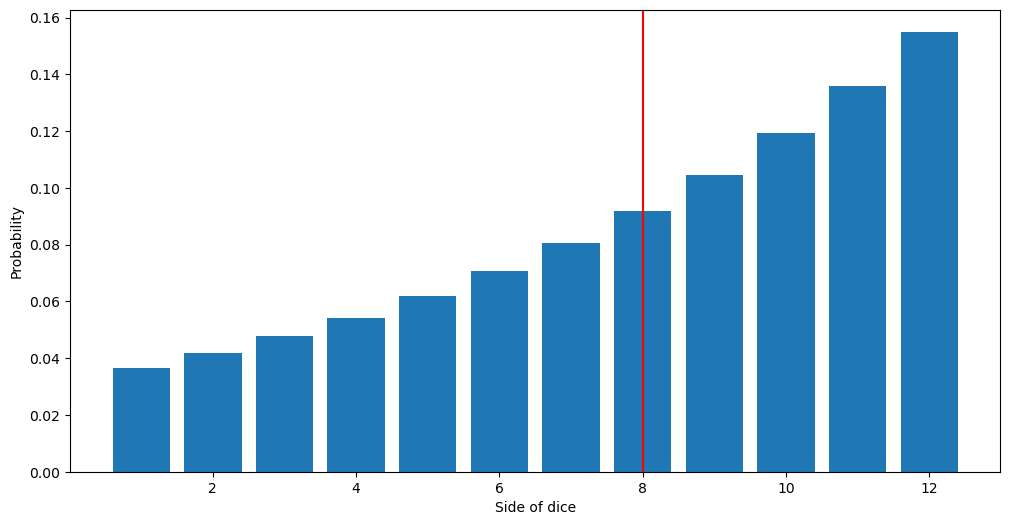

For side 1, probability = 0.0367
For side 2, probability = 0.0418
For side 3, probability = 0.0477
For side 4, probability = 0.0543
For side 5, probability = 0.0619
For side 6, probability = 0.0706
For side 7, probability = 0.0805
For side 8, probability = 0.0917
For side 9, probability = 0.105
For side 10, probability = 0.119
For side 11, probability = 0.136
For side 12, probability = 0.155
The mean is 8.0


In [5]:
die_prob(12,8)

## A model for information

What is the information $I(p)$ when observing an event with probability $p\,$?

* $I(p) \ge 0$: information has value and never decreases (but Hirshleifer)
* $I(1) = 0$: observing a certain event adds no information
* $I(p_1p_2) = i(p_1) + i(p_2)$: information from observing independent events are additive

It can be shown that the only functional form that satisfies these conditions is $I(p) = - \ln(p)$
* but it is only meaningful in a relative sense
* further, any base of logarithm would work, as long as it is consistent (sometimes you may see this written as $-\log(p\,)$, or sometimes as $-\log_2 (p)\,$)

## Shannon's information entropy

Expected information from observing a discrete event of $\mathbb{P}[\tilde{x} = x_i] = p_i$:

$$ H\,(\tilde x) = - \sum_i p_i \ln(p_i) $$

For a continuous random variable $\tilde x$ with PDF $p\,(x)$:

$$ H\,(\tilde x) = - \int_{-\infty}^\infty p\,(x) \ln\left(p\left(x\right)\right) dx $$

Information entropy $H(\tilde x)$ can also be interpreted as the disorder or lack-of-information in the distribution

## Entropy in coin toss

Consider the toss of fair and unfair coins where entropy is computed using $\log_2(\cdot)$

In [6]:
import numpy as np
p = np.array([.5, .25, .01])
i = 0
for q in p:
    print(f'For probability of heads = {p[i]:2.2}, Entropy is {-(p[i]*np.log2(p[i]) + (1-p[i])*np.log2(1-p[i])):2.2}')
    i +=1


For probability of heads = 0.5, Entropy is 1.0
For probability of heads = 0.25, Entropy is 0.81
For probability of heads = 0.01, Entropy is 0.081


Summarizing:

| **Coin** | Prob(H) | Prob(T) | **Entropy** | **Information <br> in distribution** | **Information gain <br> from observation** |
| :----: | :----: | :-----: |:-----: | :-----: | :-----: | 
| **Fair** | $\frac{1}{2}$ | $\frac{1}{2}$ | 1 | none | maximum |
| **Unfair** | $\frac{1}{4}$ | $\frac{3}{4}$ | 0.81 | more | less |
| **Robbery** | 0.01 | 0.99 | 0.08 | a lot more | a lot less |
| **Two Heads** | 1 | 0 | 0 | maximum | none |



## Under-determined problem 

An optimization problem with more variables than constraints:
* has infinite number of solutions
* requires an objective function for a unique solution
* common problem in quant finance
  * finding implied distribution from few liquid market prices
  * curve building
  
In (early) literature, various *ad hoc* objective functions are used:
* *e.g.*, sum of squares of first and second order derivatives

## Strength in Ignorance

Disorder (or the lack of information) in a distribution is highly desirable:
* more uncertainty in outcome, leaves open more possibilities
* free from the contamination of irrelevant and artificial restrictions
* the distribution is smooth and well behaved
* more difficult to arbitrage

Maximum entropy is the ideal objective for finding implied distributions:
* much better than *ad hoc* smoothness constraints
* invokes the higher principles of the information theory

From the [Wikipedia](https://en.wikipedia.org/wiki/Principle_of_maximum_entropy):
>The principle of maximum entropy states that, **subject to precisely stated prior data** (such as a proposition that expresses testable information), the **probability distribution** which **best represents the current state of knowledge** is the one with **largest entropy**. Another way of stating this: Take precisely stated prior data or testable information about a probability distribution function. Consider the set of all trial probability distributions that would encode the prior data. According to this principle, the distribution with maximal information entropy is the proper one. … In ordinary language, the principle of **maximum entropy** can be said to express a claim of epistemic modesty, or of **maximum ignorance**. The **selected distribution is the one that makes the least claim to being informed beyond the stated prior data**, that is to say the one that admits the most ignorance beyond the stated prior data.

## Maximum Entropy Optimization

For a discrete distribution of $\mathbb{P}(\tilde{x} = x_i) = p_i$, the maximum entropy optimization in vector form:

$$ \max \left(-\boldsymbol p^T \ln (\boldsymbol p) \right) $$

subject to
$$ \begin{array}{l} \boldsymbol 1^T \boldsymbol p & = 1 \\
A \boldsymbol p &= \boldsymbol b
\end{array}$$

Where all analytical functions are applied element-wise
* *e.g.* $\exp(\boldsymbol p), \ln(\boldsymbol q)$ are column vectors
$\small \frac{\partial}{\partial \boldsymbol p} \left(\boldsymbol p^T \ln(\boldsymbol p)\right) = \ln(\boldsymbol p^T) + \boldsymbol 1^T \iff
  \frac{\partial}{\partial p_k} \left(\sum_i p_i \ln(p_i)\right) = \ln(p_k) + 1$

* we only consider linear constraints, generally tractable and adequate in practice

The continuous version can be expressed similarly with integrals.

### Uniform distribution

What is maximum entropy distribution over a finite range $[a,b]$?

Apply the Lagrange multiplier and minimize:

$$
\mathcal{L} =  \int_a^b - p\,(x) \ln(p\,(x)) dx + \lambda_0 \left(\int_a^b p\,(x) dx - 1\right)
$$
$$
\frac{\partial \mathcal{L}}{\partial  p\,(x)} = -\ln( p\,(x)) - 1 + \lambda_0  =  0
$$
$$
\ln( p\,(x)) = -(1-\lambda_0)
$$
$$
p\,(x) = e^{\lambda_0-1}
$$

solving for $\lambda_0$:
$$
\lambda_0 = \ln \left(\frac{1}{b-a} \right) +1
$$
and substituting in:
$$
p\,(x) = \frac{1}{b-a}
$$

therefore, $p\,(x)$ is a uniform distribution.

### Normal distribution

What distribution has the maximum entropy with a given variance?

Apply the Lagrange multiplier:

$$
\begin{aligned}
\mathcal{L} &= - \int_{-\infty}^{\infty} p\,(x) \ln(p\,(x)) dx + \lambda_0 \left(\int_{-\infty}^{\infty} p\,(x) dx - 1\right) \\
     &  \hspace{1 in}+ \lambda_1 \left(\int_{-\infty}^{\infty} (x - \mu)^2 p\,(x) dx - \sigma^2\right) \\
& =  \int_{-\infty}^{\infty} \left(-p\,(x)\ln(p\,(x)) + \lambda_0 p\,(x) +  \lambda_1(x-\mu)^2 p\,(x) \right) dx - \lambda_0  - \sigma^2 \lambda_1 \\
& =  \int_{-\infty}^{\infty} g\,(p\,(x)) dx - \lambda_0 - \sigma^2\lambda_1 \\
\frac{\partial g\,(p\,(x))}{\partial p\,(x)} &= -\ln(p\,(x)) - 1 + \lambda_0 + \lambda_1(x-\mu)^2 = 0 \\
p\,(x) &=  \exp(\lambda_1(x-\mu)^2 + (\lambda_0 -1))
\end{aligned}$$

Taking the derivative of the Lagrange multipliers $\lambda_0$ and $\lambda_1$, solving and substituting results in the Normal distribution:

$$
p\,(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( - \frac{(x-\mu)^2}{2\sigma^2} \right)
$$

* This helps to explain the ubiquity of the normal distribution


### Exponential distribution

What distribution has the maximum entropy for a positive random variable with a given expectation $\mu$ ?

Apply the Lagrange multiplier:

$$
\begin{aligned}
\mathcal{L} &= - \int_0^{\infty} p\,(x) \ln(p\,(x)) dx + \lambda_0 \left(\int_0^{\infty} p\,(x) dx - 1\right) + \lambda_1 \left(\int_0^{\infty} x p\,(x) dx - \mu\right) \\
& = \int_0^{\infty} \left(-p\,(x)\ln(p\,(x)) + \lambda_0 p\,(x) + \lambda_1 xp\,(x) \right) dx - \lambda_0 - \mu\lambda_1 \\
& = \int_0^{\infty} g\,(p\,(x)) dx - \lambda_0 - \mu\lambda_1 \\
\frac{\partial g\,(p\,(x))}{\partial p\,(x)} &= -\ln(p\,(x)) - 1 + \lambda_0 + \lambda_1 x  = 0 \\
p\,(x) &= \exp((\lambda_0 -1) + \lambda_1 x)
\end{aligned}
$$

which results in the exponential distribution:
$$
p\,(x) = \frac{1}{\mu} \exp \left( \frac{-x}{\mu} \right) \text{   iff } x \in [0,\infty)
$$

### Other Distributions
&nbsp;

<center><img src="entropy.jpeg"></center>

Table from [Wikipedia](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution).

## Numerical examples

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import max_entropy as me
from scipy.optimize import minimize
import pandas as pd

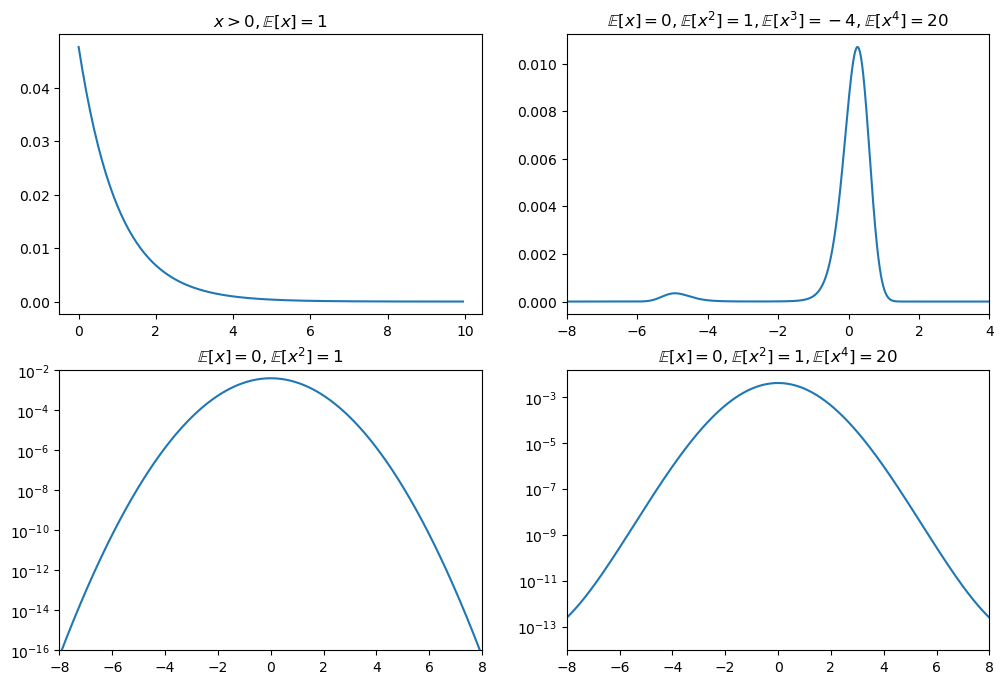

In [8]:
x = np.arange(0, 10, .05) # sets the domain of the function
b = np.array([x]) 
a = np.array([1.])
e = np.array([0])
q = np.ones(np.size(x))
dual = me.MaxEntDual(q, b, a, e)

# the np.zeros represent the initial guess for gamma_0
res = minimize(dual.dual, np.zeros(len(a)), jac=dual.grad, method="BFGS")

plt.figure(figsize=[12, 8])
plt.subplot(2, 2, 1)

plt.plot(x, dual.dist(res.x));
plt.title('$x>0, \mathbb{E}[x]=1$');

plt.subplot(2, 2, 3)
x = np.arange(-13., 13., .01)
b = np.array([x, x*x])
a = np.array([0., 1.])
e = np.array([0., 0.])
q = np.ones(np.size(x))/len(q)
dual = me.MaxEntDual(q, b, a, e)

res = minimize(dual.dual, np.zeros(len(a)), jac=dual.grad, method="BFGS")
plt.semilogy(x, dual.dist(res.x))
plt.xlim(-8, 8)
plt.ylim(1e-16, 1e-2)
plt.title('$\mathbb{E}[x] = 0, \mathbb{E}[x^2] = 1$');

plt.subplot(2, 2, 4)
b = np.vstack([b, x*x*x*x])
a = np.append(a, 20)
e = np.append(e, 0)
dual = me.MaxEntDual(q, b, a, e)

res = minimize(dual.dual, np.zeros(len(a)), jac=dual.grad, method="BFGS")
plt.semilogy(x, dual.dist(res.x))
plt.xlim(-8, 8)
plt.title('$\mathbb{E}[x] = 0, \mathbb{E}[x^2] = 1, \mathbb{E}[x^4] = 20$');

plt.subplot(2, 2, 2)
b = np.vstack([b, x*x*x])
a = np.append(a, -4)
e = np.append(e, 0)
dual = me.MaxEntDual(q, b, a, e)

res = minimize(dual.dual, np.zeros(len(a)), jac=dual.grad, method="BFGS")
plt.plot(x, dual.dist(res.x))
plt.xlim(-8, 4)
plt.title('$\mathbb{E}[x] = 0, \mathbb{E}[x^2] = 1, \mathbb{E}[x^3] = -4, \mathbb{E}[x^4] = 20$');

## Cross entropy

Cross entropy is a measure of incremental information in a 
distribution $p$ in relative to a prior (predicted) distribution $q$; 

$$ H(p,q) = -\sum_k p_k \ln(q_k)$$

As you can see, it looks pretty similar to the equation of entropy except for the fact that we use the log of predicted probability here. If the predicted probability function is perfect, that is the predicted distribution is equal to the true distribution, then the cross-entropy is simply equal to entropy. But, if the distributions differ, then the cross-entropy will be greater than the entropy.

The amount by which the cross-entropy exceeds the entropy is called the Relative Entropy or more commonly known as the Kullback-Leibler Divergence (KL Divergence). 

With a discrete prior $\mathbb{P}[\tilde{x} = x_k] = q_k$ and posterior $p_k$ :

$$ H(p | q) = -\sum_k p_k \ln(q_k) + \sum_k p_k \ln(p_k) =  \sum_k p_k \ln\left(\frac{p_k}{q_k}\right) $$

Similarly with a continuous prior $q(x)$ and posterior $p(x)$ :

$$ H\left(p\,(x) | q\,(x)\right) =  \int_{-\infty}^{\infty} p\,(x) \ln \left(\frac{p\,(x)}{q\,(x)}\right) dx $$

The smaller the cross entropy is, the more incremental information in $p$ from $q$.
You can think about as the information gain when updating belief from a prior $p$ to the posterior $p|q$.

### Properties of residual entropy

* can be used to measure of the incremental information in $\boldsymbol p$ from $\boldsymbol q$:
* reduces to regular entropy when the prior $\boldsymbol q$ is uniform
* maximized with value 0 when $\boldsymbol p = \boldsymbol q$.
 * no additional information
 * Proof: apply the Lagrange multiplier
* $H(\boldsymbol p| \boldsymbol q) = -\infty$ if $p_k > 0$ for some $q_k = 0$
 * new discovery adds infinite amount of new information
* finite if $p_k = 0$ for some $q_k > 0$
 * not much value for disproving an existing theory
* Prior and posterior distributions are asymmetric $H(\boldsymbol p | \boldsymbol q) \ne H(\boldsymbol q | \boldsymbol p)$
 * Kullback–Leibler distance is actually a misnomer

### Prior beliefs in the market

Prior beliefs are common in the market:

* *e.g.* stock returns are normally distributed

Maximizing cross entropy is an ideal objective function that can be used to capture prior beliefs
* Only introduce minimal perturbation to the prior beliefs $\boldsymbol q$
* While incorporating additional constraints to the distribution $\boldsymbol p$

## Residual entropy optimization with bid/ask

Take the discrete form of residual entropy:

$$ \text{argmax}_{\boldsymbol p}  \left(- \boldsymbol p^T \left(\ln(\boldsymbol p) - \ln(\boldsymbol q)\right) - \tfrac{1}{2} \boldsymbol e^T W \boldsymbol e \right) $$
subject to : 
 $$\begin{aligned}\\
 \boldsymbol 1^T \boldsymbol p & = 1 \\
 A \boldsymbol p &= \boldsymbol b + \boldsymbol e 
 \end{aligned}$$
 
* $A$ is a matrix that computes benchmark prices from the distribution
* $\boldsymbol b$ is the observed mid price of benchmark instruments
* $\boldsymbol e$ is the pricing error to the mid price
* $W$ is a diagonal penalty matrix, we usually choose $W^{-1} = \alpha E$
  * where $E$ is a diagonal matrix of bid/ask spreads, 
  * $\alpha$ controls the trade off between fit quality and entropy

This problem is difficult to solve due to the the number of dimensions and constraints.

Let's try using the Lagrange multiplier techniques:

$$
\begin{aligned} \\ 
\mathcal{L} &= - \boldsymbol p^T \left(\ln(\boldsymbol p) - \ln(\boldsymbol q)\right)  - \frac{1}{2} \boldsymbol e^T W \boldsymbol e -
\boldsymbol {\gamma_0}^T(A\boldsymbol p - \boldsymbol b - \boldsymbol e)  - \gamma_1 (\boldsymbol 1^T \boldsymbol p - 1) \\
\frac{\partial \mathcal{L}}{\partial \boldsymbol p} &= \ln(\boldsymbol q^T) -\ln(\boldsymbol p^T) - \boldsymbol 1^T - \boldsymbol {\gamma_0}^T A - \gamma_1 \boldsymbol 1^T = 0 \\
\ln(\boldsymbol p^*) &= \ln(\boldsymbol q) - A^T \boldsymbol {\gamma_0} - \boldsymbol 1 - \gamma_1 \boldsymbol 1 \\
\end{aligned}$$

* $\boldsymbol p^*$ is the optimal solution. 
* we haven't solved the problem, as $\boldsymbol e, \boldsymbol {\gamma_0}, \gamma_1 $ remain unknown 

but the dimensionality of $\mathcal{L}$ is reduced, by plugging in $\boldsymbol p^*$:

$$\begin{aligned} \\ 
\mathcal{L} &= - \boldsymbol p^{*T} \left( - A^T \boldsymbol {\gamma_0} - \boldsymbol 1 - \gamma_1 \boldsymbol 1 \right)  -  \frac{1}{2} \boldsymbol e^T W \boldsymbol e -
\boldsymbol {\gamma_0}^T(A\boldsymbol p^* - \boldsymbol b - \boldsymbol e)  - \gamma_1 (\boldsymbol 1^T \boldsymbol p^* - 1) \\
 &= \boldsymbol p^{*T} \boldsymbol 1 - \frac{1}{2} \boldsymbol e^T W \boldsymbol e + \boldsymbol {\gamma_0}^T \boldsymbol b + \boldsymbol {\gamma_0}^T \boldsymbol e + \gamma_1 \\
\end{aligned} $$

What do we do with $\boldsymbol e\,$?

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol e} = - \boldsymbol e^T W + \boldsymbol {\gamma_0}^T = \boldsymbol 0^T \iff \boldsymbol e = W^{-1} \boldsymbol {\gamma_0} 
$$

plug $\boldsymbol e$ back to $\mathcal{L}$:

$$
\mathcal{L} = \boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0} - 1 - \gamma_1) + \frac{1}{2} \boldsymbol {\gamma_0}^T W^{-1} \boldsymbol {\gamma_0} + \boldsymbol {\gamma_0}^T \boldsymbol b + \gamma_1
$$

do the same to $\gamma_1$:

$$\begin{aligned}
\\ \frac{\partial \mathcal{L}}{\partial \gamma_1} &= - \boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0} - 1 - \gamma_1) + 1  \\
&= - \boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0}) \exp(- 1 - \gamma_1) + 1 = 0 \\
\gamma_1 &= \ln \left(\boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0})\right) - 1 \\
\end{aligned}$$

plug $\gamma_1$ in to $\mathcal{L}$:

$$\begin{aligned}
\\ \mathcal{L} &= 1 + \tfrac{1}{2} \boldsymbol {\gamma_0}^T W^{-1} \boldsymbol {\gamma_0} + \boldsymbol {\gamma_0}^T \boldsymbol b + \ln \left(\boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0})\right) - 1 \\
 &= \ln \left(\boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0})\right) + \tfrac{1}{2} \boldsymbol {\gamma_0}^T W^{-1} \boldsymbol {\gamma_0} + \boldsymbol {\gamma_0}^T \boldsymbol b
\end{aligned}$$

Now $\boldsymbol {\gamma_0}$ are the only unknowns, this $\mathcal{L}$ is much easier to minimize.

## Dual problem

**Original Problem:**
$$\text{argmax}_{\boldsymbol p} - \left(\boldsymbol p^T \ln(\boldsymbol p) - \ln(\boldsymbol q) - \tfrac{1}{2} \boldsymbol e^T W \boldsymbol e \right) $$
subject to : 
 $$\begin{aligned}\\
 \boldsymbol 1^T \boldsymbol p & = 1 \\
 A \boldsymbol p &= \boldsymbol b + \boldsymbol e 
 \end{aligned}$$

Where we solve for $\boldsymbol p$ and has high dimensionality




**Dual Problem:**
$$\text{argmin}_{\boldsymbol p} \ln \left(\boldsymbol q^T \exp(-A^T \boldsymbol {\gamma_0})\right) + \tfrac{1}{2} \boldsymbol {\gamma_0}^T W^{-1} \boldsymbol {\gamma_0} + \boldsymbol {\gamma_0}^T \boldsymbol b$$

With no constraints.
Where we solve for $\boldsymbol {\gamma_0}$ and has low dimensionality





* Both are convex
* The dual problem is much easier to solve 
  * the gradient is analytical, suitable for gradient descent
* A solution is guaranteed to exist if $W$ is diagonal and positive

Once we find the optimal $\boldsymbol {\gamma_0}^*$ that minimizes the dual objective, we can solve for $\boldsymbol p^*$:

$$
\boldsymbol p^* = \frac{\boldsymbol q \odot \exp(- A^T \boldsymbol {\gamma_0}^*)}{\boldsymbol q^T \exp(- A^T \boldsymbol {\gamma_0}^*)}
$$

* Where $\odot$ is element-wise multiplication

## Example: Volatility skew

In the option market, OTM calls have a  higher implied volatility than the ATM/ITM calls.

Suppose we only have the following three liquid 5M S&P500 index options:

In [9]:
from instruments import BlackScholes
from scipy.stats import norm


def optionCons(strikes, s) :
    a = [np.maximum(s-k, 0) for k in strikes]
    return np.array(a)


iv = np.array([.1594, .1481, .1383])

s = 1652.32
r = 0.
t = 5./12

ks = np.array([1611, s, 1694])

cs = np.array([BlackScholes.callPrice(0, s, k, t, v) for k, v in zip(ks, iv)])
d = np.array([BlackScholes.callDelta(0, s, k, t, v) for k, v in zip(ks, iv)])

df_opt = pd.DataFrame(np.array([cs, iv*100, d]).T, columns = ["Call Price", "Implied Vol(%)", "Delta"], index=ks)
display(df_opt)


,Call Price,Implied Vol(%),Delta
1611.00,89.622759,15.94,0.616988
1652.32,62.992423,14.81,0.519062
1694.00,41.031765,13.83,0.407328


How can we price the illiquid options with other strikes?

### Entropy optimization setup

We sample the future stock price distribution discretely as: $p_i = \mathbb{P}[s(t = 5M) = s_i]$, where $s_i$ is a discretization of the stock prices.

Each observed option price $v(k)$ becomes a linear constraint in $p_i$:

$$ b(t) \mathbb{E}[(s(t)-k)^+] = b(t) \sum_i p_i (s_i - k)^+ = v(k) $$ 

* The machinery of the dual maximum entropy setup is then applied to find the implied distribution of $\boldsymbol p^*$
* Option prices of all strikes are then known from $\boldsymbol p^*$
* The discounting $b(t)$ is ignored as the time horizon is very short.

### Maximum entropy solution



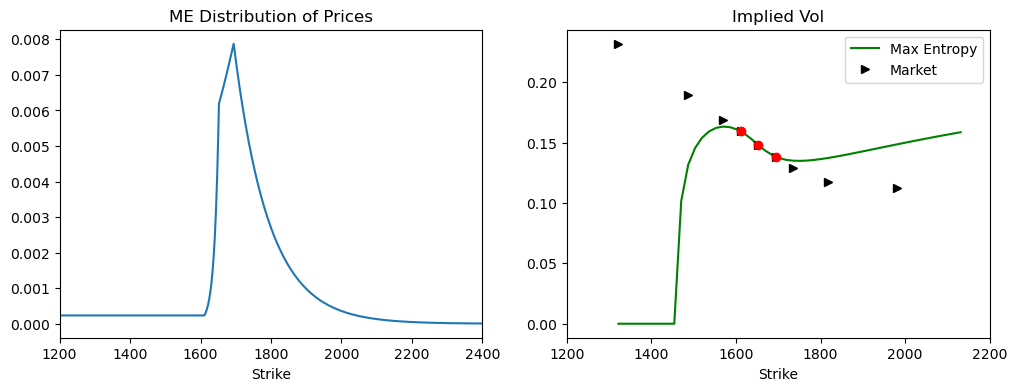

In [10]:
x = s*np.exp(np.arange(-1.5, 3, .001))
q = np.ones(len(x))
qn = norm.pdf((np.log(x/s)+.5*iv[1]*iv[1]*t)/(iv[1]*np.sqrt(t)))
qn = qn/sum(qn)

a = optionCons(ks, x)
e = np.ones(len(ks))*.0

mks = np.array([1322,  1487,  1570,  1611,  1652,  1694,  1735, 1818, 1982])
mvs = np.array([.2319, .1895, .1687, .1594, .1481, .1383, .1289, .1176, .1125])

dual = me.MaxEntDual(q, a, cs, e)
res = minimize(dual.dual, np.zeros(len(cs)), jac=dual.grad, method="BFGS")
po = dual.dist(res.x)

kd = np.arange(80., 130., 1.)/100*s
cd = np.array([po.dot(np.maximum(x-k, 0)) for k in kd])
vd = [BlackScholes.compImpliedVolFromCall(0., s, k, t, c) for k, c in zip(kd, cd)]
#dd = [BlackScholes.callDelta(0, s, k, 1, v) for k, v in zip(kd, vd)]

plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(x, dual.dist(res.x))
plt.xlabel('Strike')
plt.title('ME Distribution of Prices')
plt.xlim(1200,2400)

plt.subplot(1, 2, 2)
plt.plot(kd, vd, 'g-')
plt.plot(mks, mvs, 'k>')
plt.plot(ks, iv, 'ro')
plt.xlim(1200, 2200)
plt.xlabel('Strike')
plt.title('Implied Vol');
plt.legend(['Max Entropy', 'Market']);

The Maximum Entropy optimization results without a prior does not make much sense even though it exactly reprices the observed prices.

### Use prior belief

We can take advantage of a prior belief that stock returns are normal, and use the observed ATM vol in the prior.  


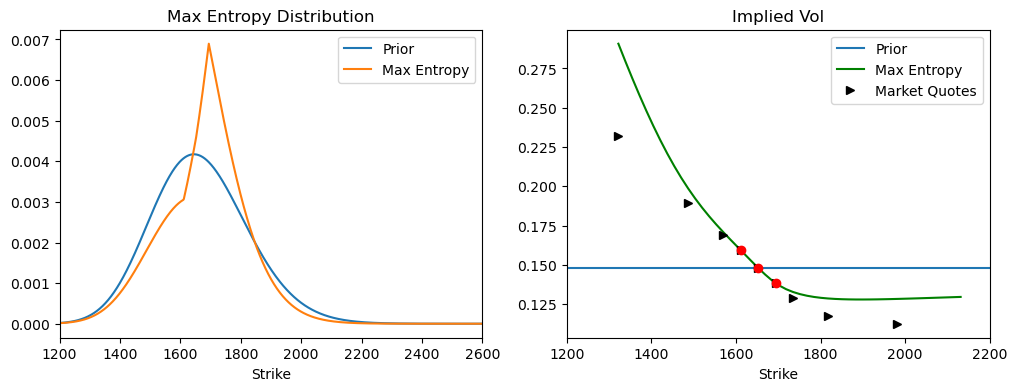

In [11]:
import warnings
warnings.filterwarnings("ignore")


dual = me.MaxEntDual(qn, a, cs, e)
res = minimize(dual.dual, np.zeros(len(cs)), jac=dual.grad, method="BFGS")
po = dual.dist(res.x)

cd = np.array([po.dot(np.maximum(x-k, 0)) for k in kd])
vd = [BlackScholes.compImpliedVolFromCall(0, s, k, t, c) for k, c in zip(kd, cd)]
#dd = [BlackScholes.callDelta(0, s, k, 1, v) for k, v in zip(kd, vd)]

plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(x, qn)
plt.plot(x, dual.dist(res.x))
plt.xlabel('Strike')
plt.title('Max Entropy Distribution')
plt.legend(['Prior', 'Max Entropy'])
plt.xlim(1200,2600)

plt.subplot(1, 2, 2)
plt.axhline(iv[1])
plt.plot(kd, vd, 'g-')
plt.plot(mks, mvs, 'k>')
plt.plot(ks, iv, 'ro')
plt.xlim(1200, 2200)
plt.xlabel('Strike')
plt.legend(['Prior', 'Max Entropy', 'Market Quotes'])
plt.title('Implied Vol');


* The resulting distribution and volatility skew are more reasonable
* The whole vol skew curve is inferred from three option prices
* The resulting option prices are very close to the actual market

## Summary of maximum entropy

The maximum entropy method is elegant and powerful 
* effective in dealing with partial information and incomplete market
* brings many types of problems into a consistent framework

Main limitations:
* all possible outcomes has to be enumerated, not good for high dimensionality
* it is static, and does not give useful insight on the dynamics

The maximum entropy problem and solution are measure dependent
* *e.g.*, results are different between spot measure and forward measure

# Final Project

## Due May 13th @ Midnight

**Key Points:**
* Must be **Individual** work
* You must submit a write-up of the project
    * Code must be included along with any special data
    * Write-up will demonstrate **your** understanding of the code and project
* Write-up and code must be in one `jupyter notebook`, data must either be the result of the code (*i.e.* called from some source) or provided in a separate file that the code loads 
* **Note:** if you use data from something that requires an API key, you must provide the data in a separate file
* Code must be clear and commented (see Coding Suggestions)
* Write-up must be clear and sufficient to demonstrate your understanding and explain what you have done
* If you use code from another source (github, webpage, blog, paper, thesis, work, etc.), you must disclose that source **and** provide a link to the source along with the code that you use.

Think about this project as an assignment from your manager, who wants to understand the technique/approach used and whether it could be applied in the company. 
* How well does it work? 
*  What are the benefits? 
* What are the problems/downsides? 
* Do you recommend its application? 
* Why or why not?

This project should be something that you are proud of and can use as a demonstration of your abilities in problem solving, coding, and writing for a future employer.

**Grading:**
* Does the code actually run and do what you say it does? We must be able to run the code without any problems.
* Is the code clear, structured, and commented? Do variable names make sense? Are the purposes/implementation of functions clear?
* Does the write-up clearly explain what you have done and why?
* Does it demonstrate your understanding of the problem/project and the code?
* Does it make sense? And is it easy to read?

# Last Thoughts & Career Advice

## Learning
* Interactive
* Curiosity
* Limitless
* Focused
* Continuous

## Career
* "They pay me for this?"
* "Don't be afraid!"
* "Don't be a jerk!"
* "Your best friend!"
* "Dig your well before you are thirsty!"
* "It's a small, small world!"
* "Praise in public, critique in private!"
* "Sell, sell, sell!"
* "Learn to communicate!"
* "Walk the path!"